In [86]:
#my variant is 5,it's https://archive.ics.uci.edu/ml/datasets/Abalone

#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [87]:
#Load the dataset
df = pd.read_csv('abalone.data')

#Print the first 5 rows of the dataframe.
df.head()

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [88]:
#observe the shape of the dataframe.
df.shape

(4177, 9)

This dataset's target is Rings.
As observed above we have 4177 rows and 9 columns. The first 8 columns represent the features and the last column represent the target/label. 

In [89]:
#create numpy arrays for features and target
X = df.drop('Rings',axis=1).values
X[X=='M']=1
X[X=='F']=2
X[X=='I']=3
#deal with the sex to 1,2,3
y = df['Rings'].values
print(y)
# print(X)
#show the X

[15  7  9 ...  9 10 12]


In [90]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=3)

In [92]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,60)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
ss= StandardScaler()
#Standard the data
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

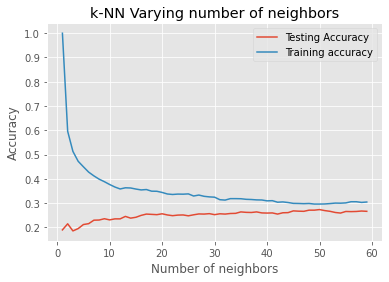

In [93]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
#find the best k

In [94]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=50)
#with the graph ,choose number of neighbors as 50

In [95]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=50)

In [96]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)
#this is a mutil-classification ,so I find that accuracy is silghtly low.

0.27289048473967686

**Confusion Matrix**

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Scikit-learn provides facility to calculate confusion matrix using the confusion_matrix method.

In [97]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [98]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [99]:
confusion_matrix(y_test,y_pred)

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   2,   3,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  10,  12,   1,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   4,  16,  13,  10,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,  15,  29,  52,   4,   6,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   2,  25,  56,  35,  27,   7,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  10,  38,  76,  83,  24,   5,   0,   1,
   

In [100]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,4,5,6,7,8,9,10,11,12,13,15,16,All
True,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,1
3,2,3,0,0,0,0,0,0,0,0,0,0,5
4,10,12,1,1,0,0,0,0,0,0,0,0,24
5,4,16,13,10,0,0,0,0,0,0,0,0,43
6,1,15,29,52,4,6,1,0,0,0,0,0,108
7,0,2,25,56,35,27,7,0,0,0,0,0,152
8,0,0,10,38,76,83,24,5,0,1,0,0,237
9,0,0,3,11,48,132,29,20,0,0,0,0,243
